# ARMA Order Determination

The $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

Typically a time series is either $\text{AR}(p)$ or $\text{MA}(q)$. When calibrating a time series to an $\text{AR}(p)$</br>
or $\text{MA}(q)$ process a method is needed to determine the values of $p$ and $q$. For an $\text{MA}(q)$ process</br>
the autocorrelation function (ACF) is used. The ACF is defined by,

$
\begin{align}
\rho_\tau = \frac{\text{E}[X_t X_{t+\tau}]}{\text{E}[X_t^2]}
\end{align}
$

For values of $\tau > q$ the ACF is zero for an $\text{MA}(q)$ process.

Similarly, for an $\text{AR}(p)$ process the partial autocorrelation function (PACF) is used. The PACF</br> 
is computed using the Yule-Walker equations. Recall that the Yule-Walker equations relate the autocorrelation</br>
function to the $\text{AR}(p)$ coefficients $\varphi_i$. Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{p-1} \\
\rho_{p}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{p-1} \\
\varphi_{p}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{p-2} & \rho_{p-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{p-3} & \rho_{p-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{p-4} & \rho_{p-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{p-2} & \rho_{p-3} & \rho_{p-4} & \cdots & 1 & \rho_1 \\
\rho_{p-1} & \rho_{p-2} & \rho_{p-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

So, the partial autocorrelation function, PACF, is given by,

$
\begin{align}
\hat{R}^{-1} \hat{r}
\end{align}
$

For lags grater than the time series order $p$ the PACF is zero. Combining these give a method</br>
for determining the order of an $\text{ARMA}(p,q)$ process.

## Imports

In [3]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType)
from lib import (stack, fpoints, fcurve, twinx)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [80]:
σ = 1
nsample = 1000
nlags = 10

def ar_comparison(φ_vals, title, ylim, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    return scan

def ma_comparison(θ_vals, title, ylim, *params):
    labels = [f"θ={val}" for val in θ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.MA, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    return scan

def pacf_acf_plot(df, nlags, ylim):
    df = DataFunc.apply_func_type(df, DataType.ACF, nlags=nlags)
    df = DataFunc.apply_func_type(df, DataType.PACF, nlags=nlags)
    twinx(df, left_data_type=DataType.ACF, right_data_type=DataType.PACF, ylim=ylim)

## $\text{AR}(p)$

### AR(1) Simulations

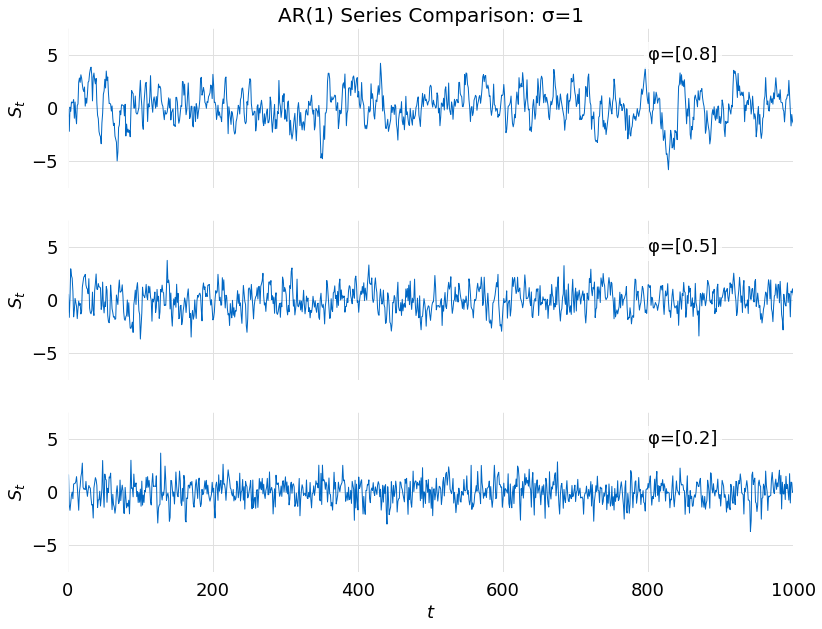

In [81]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [[0.8], [0.5], [0.2]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = ar_comparison(φ_vals, title, [-7.5, 7.5], *params)

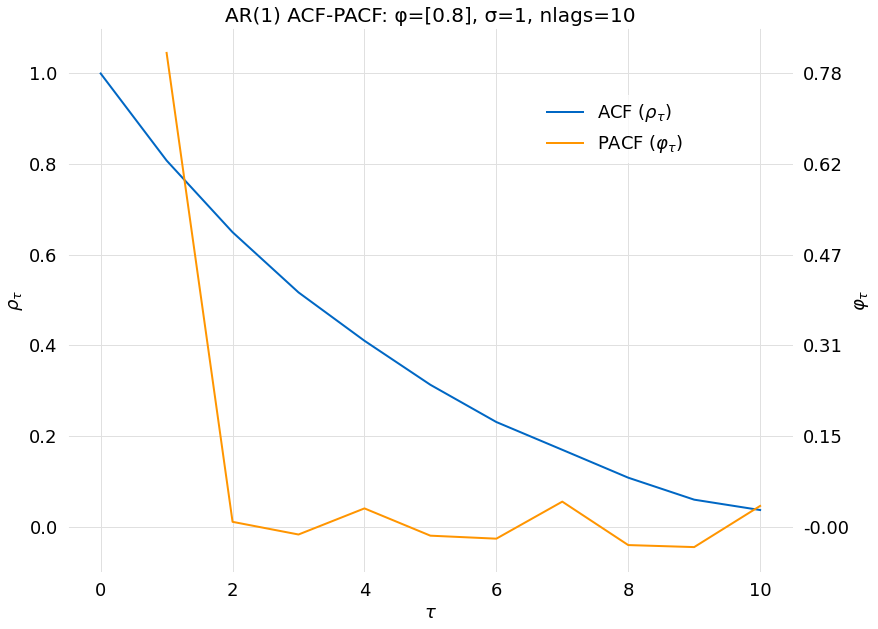

In [69]:
pacf_acf_plot(ar[0], nlags, [-0.1, 1.1])

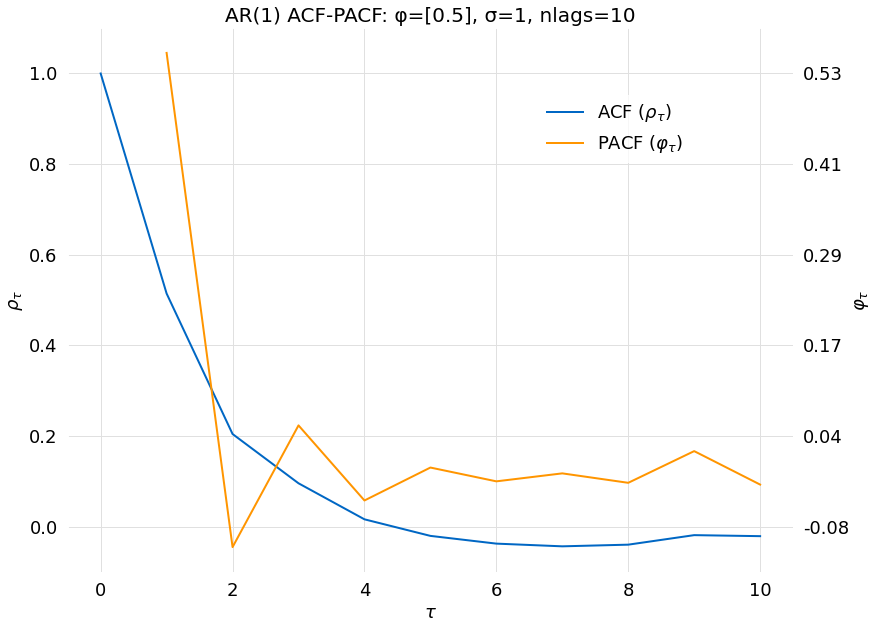

In [70]:
pacf_acf_plot(ar[1], nlags, [-0.1, 1.1])

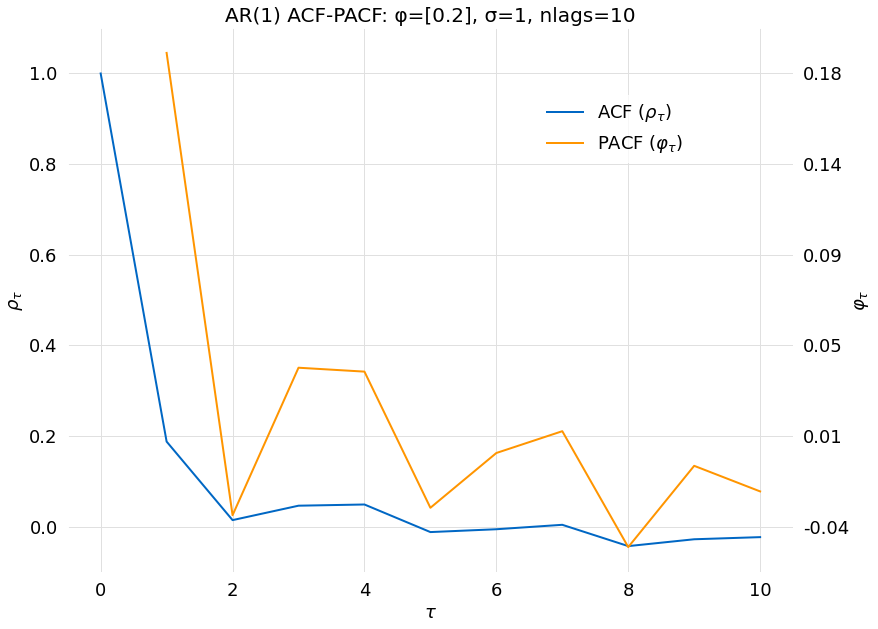

In [71]:
pacf_acf_plot(ar[2], nlags, [-0.1, 1.1])

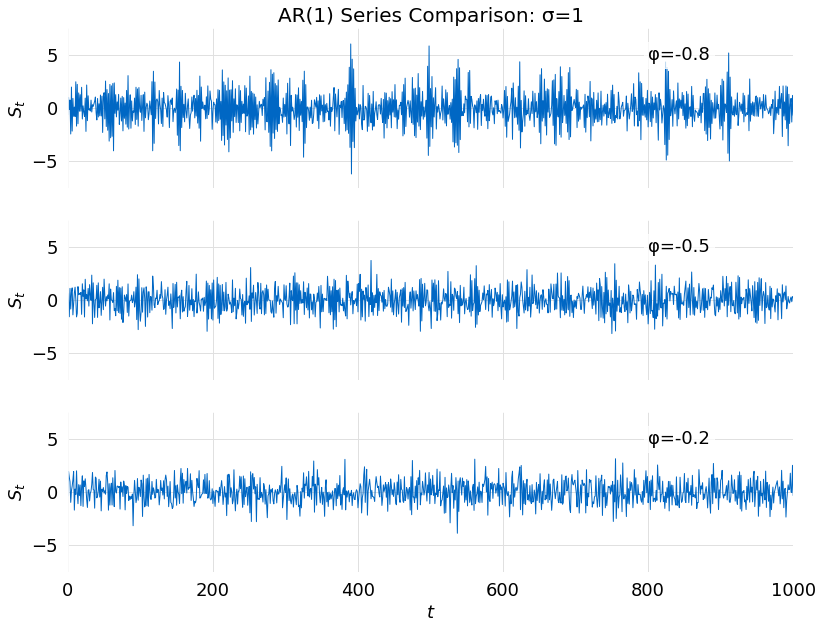

In [72]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [-0.8, -0.5, -0.2]
params = [{"φ": [φ], "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = ar_comparison(φ_vals, title, [-7.5, 7.5], *params)

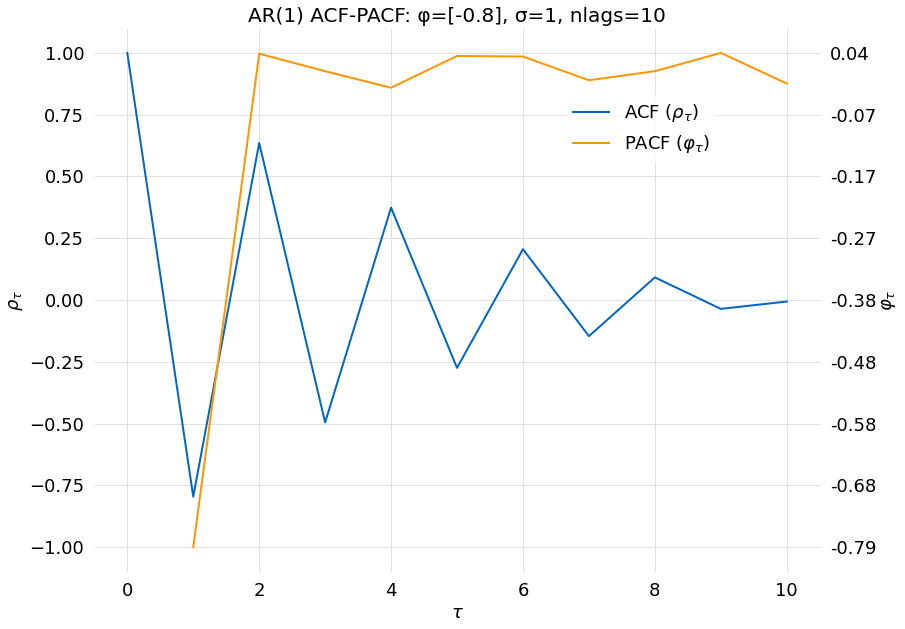

In [73]:
pacf_acf_plot(ar[0], nlags, [-1.1, 1.1])

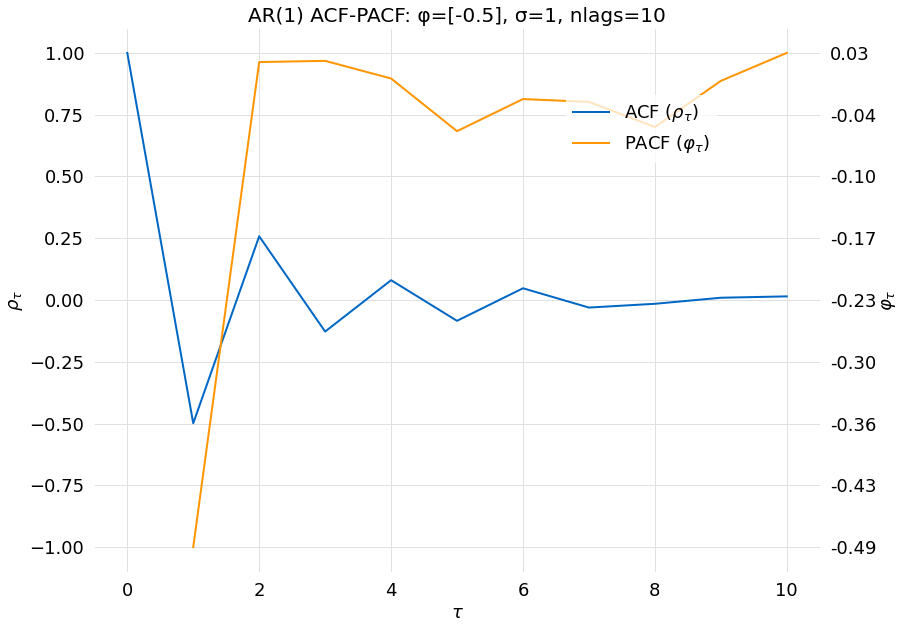

In [74]:
pacf_acf_plot(ar[1], nlags, [-1.1, 1.1])

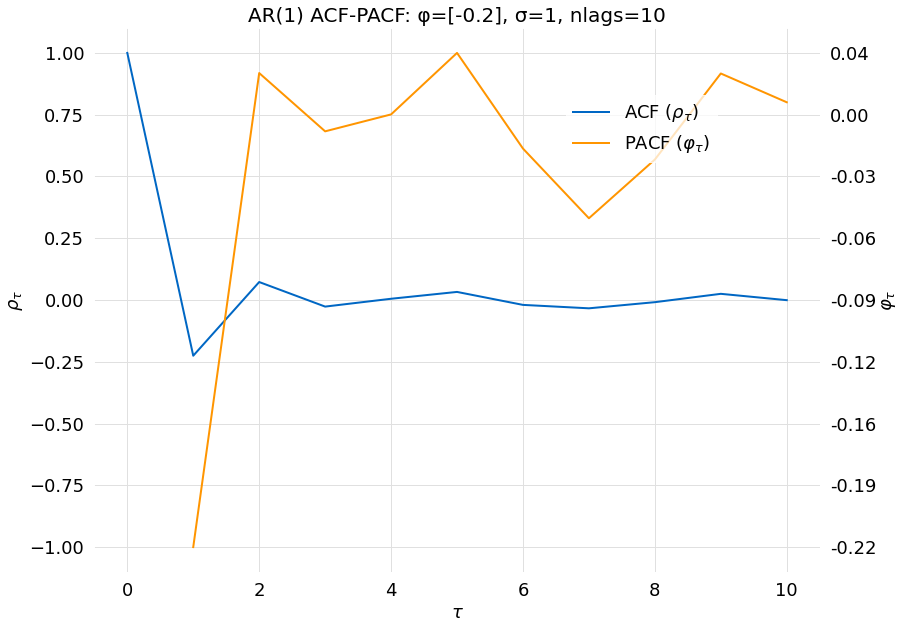

In [75]:
pacf_acf_plot(ar[2], nlags, [-1.1, 1.1])

### AR(2) and AR(3) Simulations

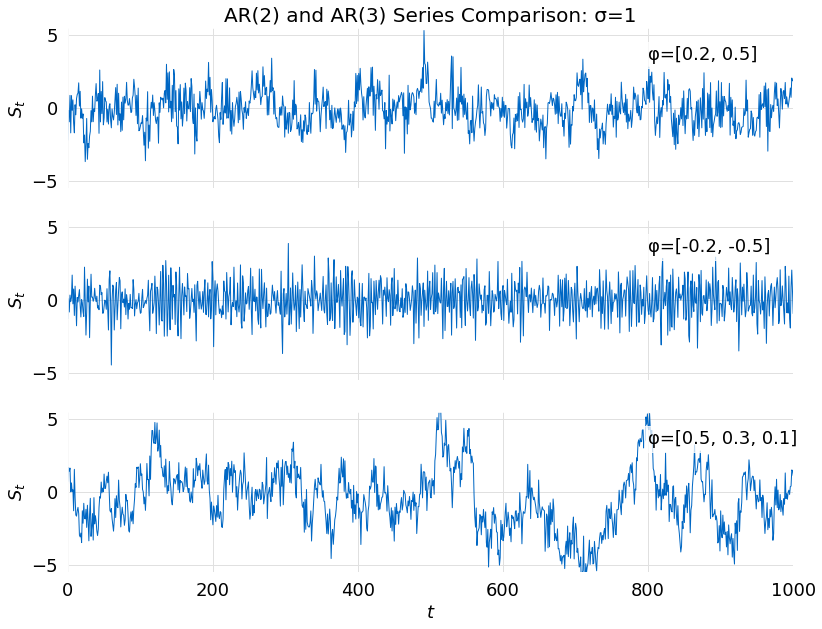

In [84]:
title = f"AR(2) and AR(3) Series Comparison: σ={σ}"
φ_vals = [[0.2, 0.5],[-0.2, -0.5], [0.5, 0.3, 0.1]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = ar_comparison(φ_vals, title, [-5.5, 5.5], *params)

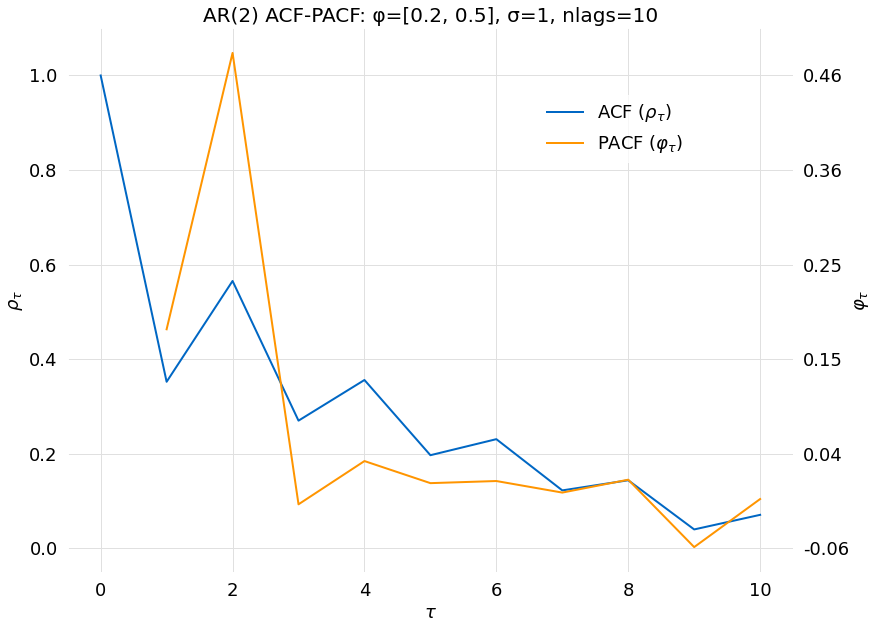

In [77]:
pacf_acf_plot(ar[0], nlags, [-0.05, 1.1])

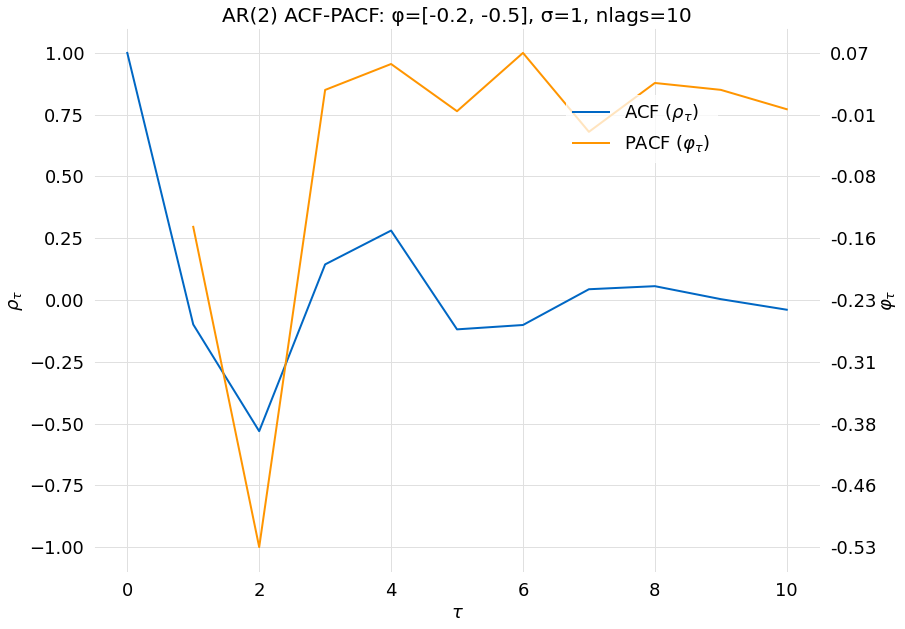

In [78]:
pacf_acf_plot(ar[1], nlags, [-1.1, 1.1])

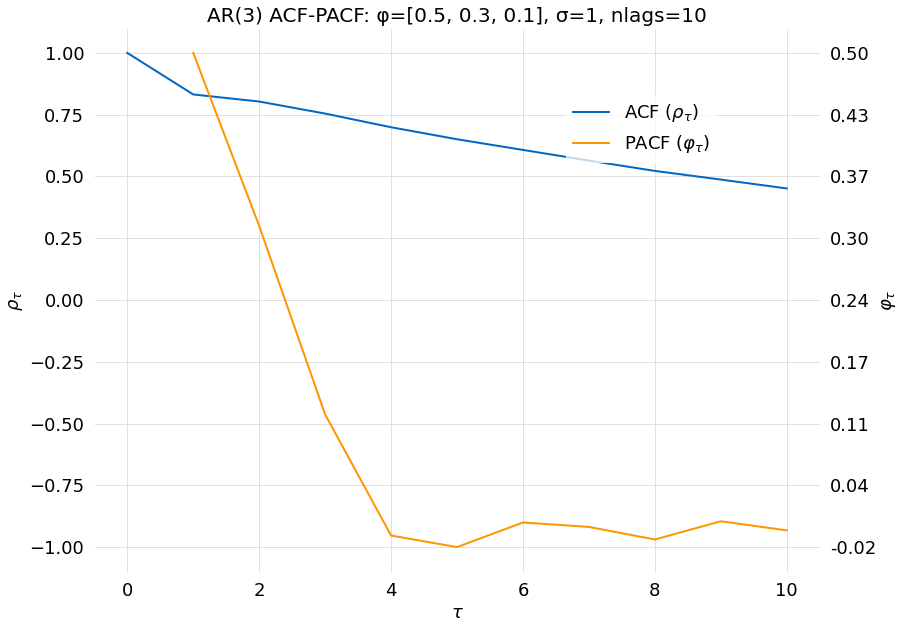

In [79]:
pacf_acf_plot(ar[2], nlags, [-1.1, 1.1])

## $\text{MA}(q)$

### MA(1) Simulations

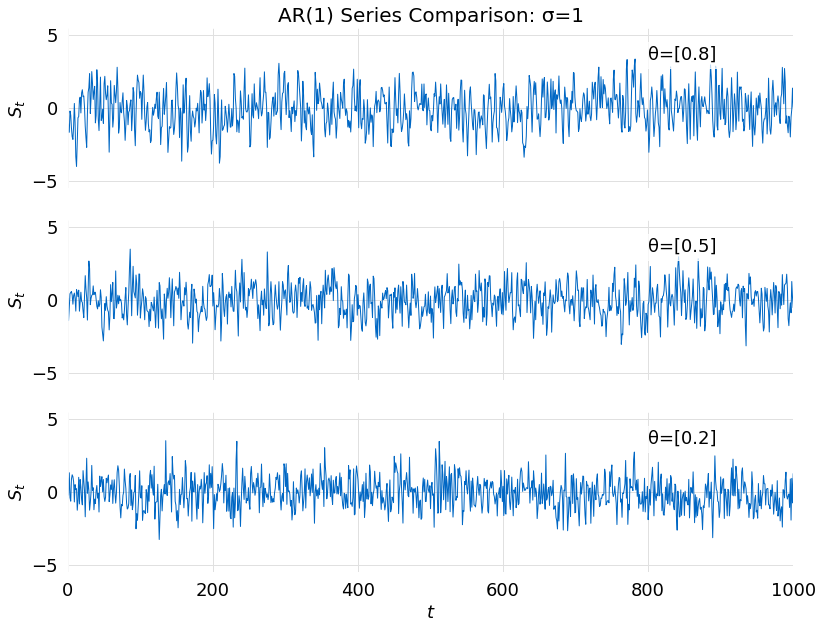

In [83]:
title = f"MA(1) Series Comparison: σ={σ}"
θ_vals = [[0.8], [0.5],[0.2]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
ma = ma_comparison(φ_vals, title, [-5.5, 5.5], *params)

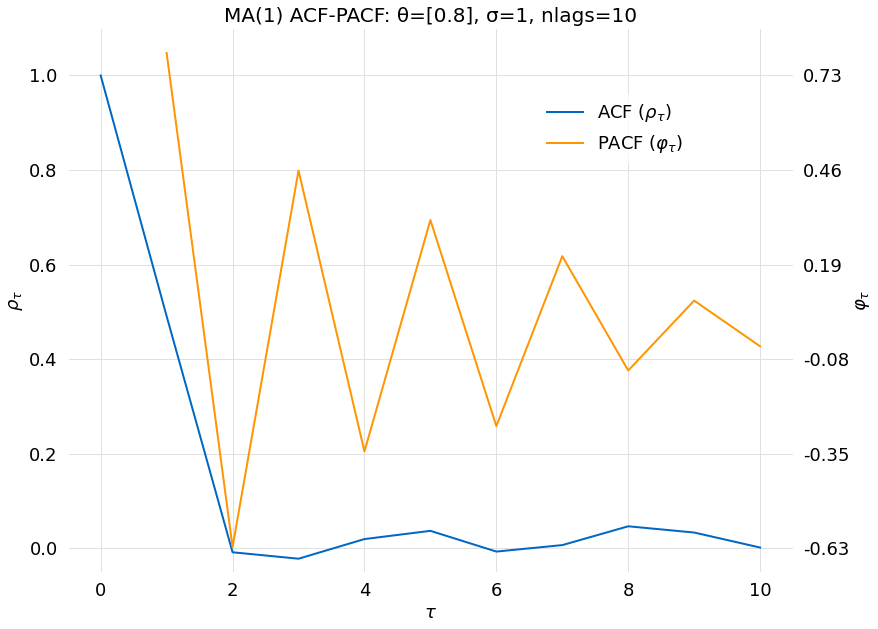

In [88]:
pacf_acf_plot(ma[0], nlags, [-0.05, 1.1])

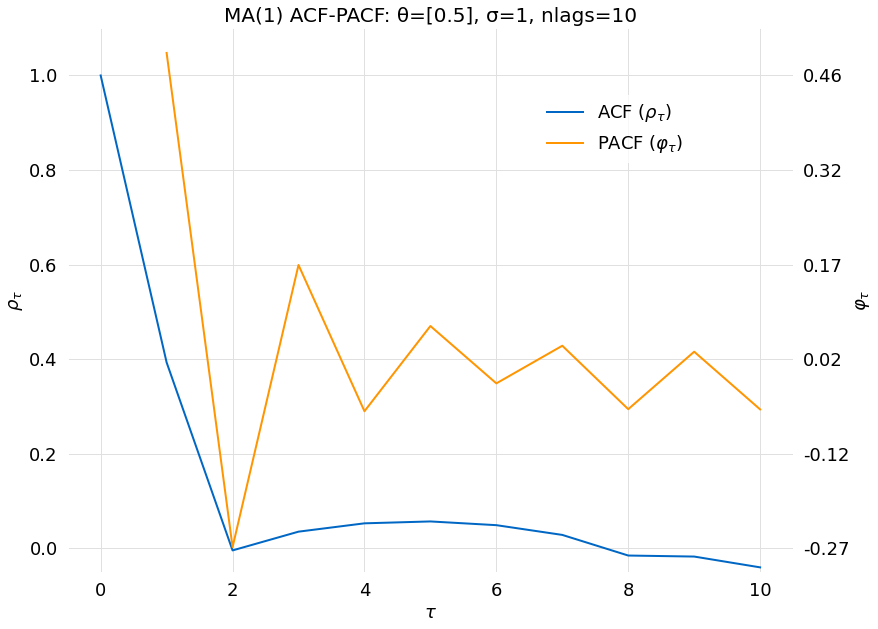

In [89]:
pacf_acf_plot(ma[1], nlags, [-0.05, 1.1])

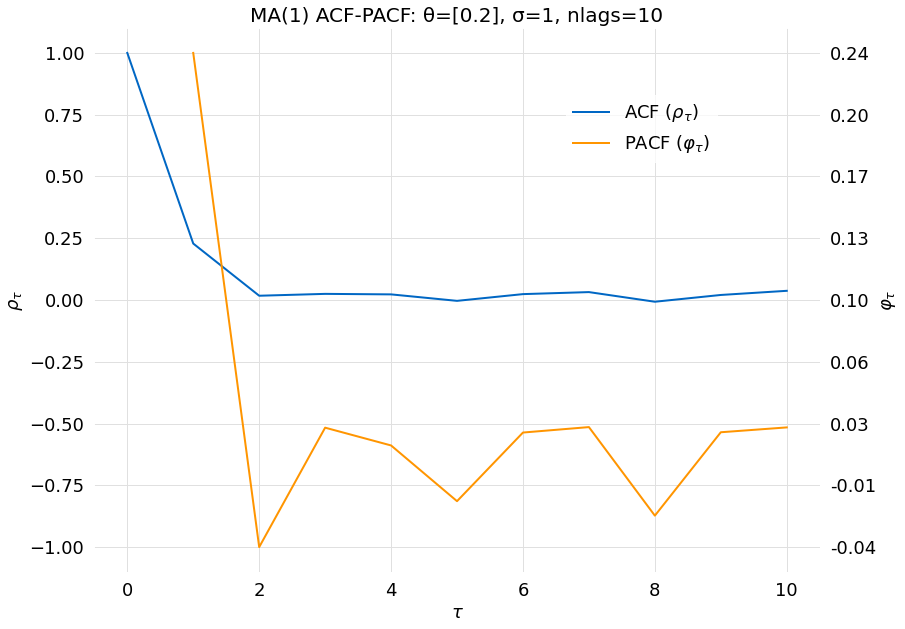

In [90]:
pacf_acf_plot(ma[2], nlags, [-1.1, 1.1])

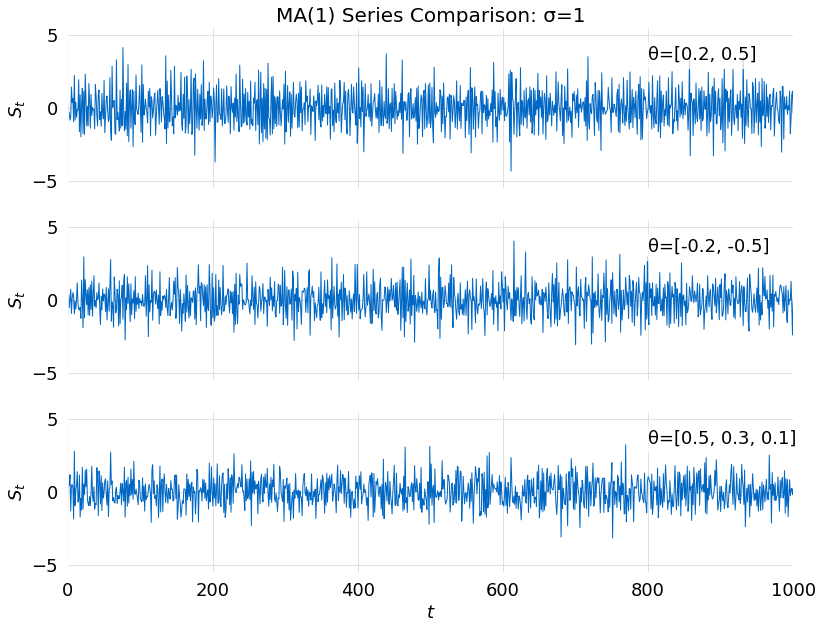

In [91]:
title = f"MA(1) Series Comparison: σ={σ}"
θ_vals = [[-0.8], [-0.5],[-0.2]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
ma = ma_comparison(φ_vals, title, [-5.5, 5.5], *params)

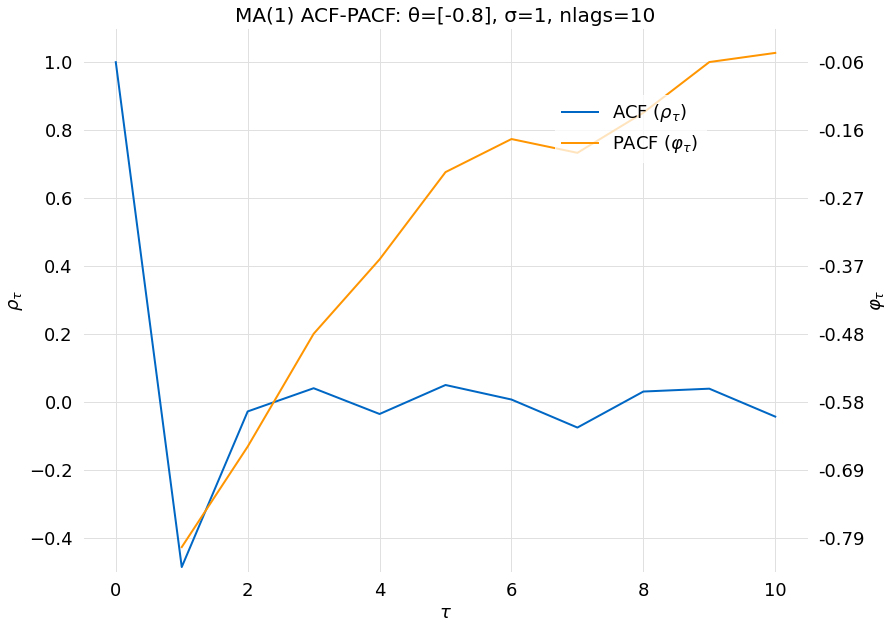

In [94]:
pacf_acf_plot(ma[0], nlags, [-0.5, 1.1])

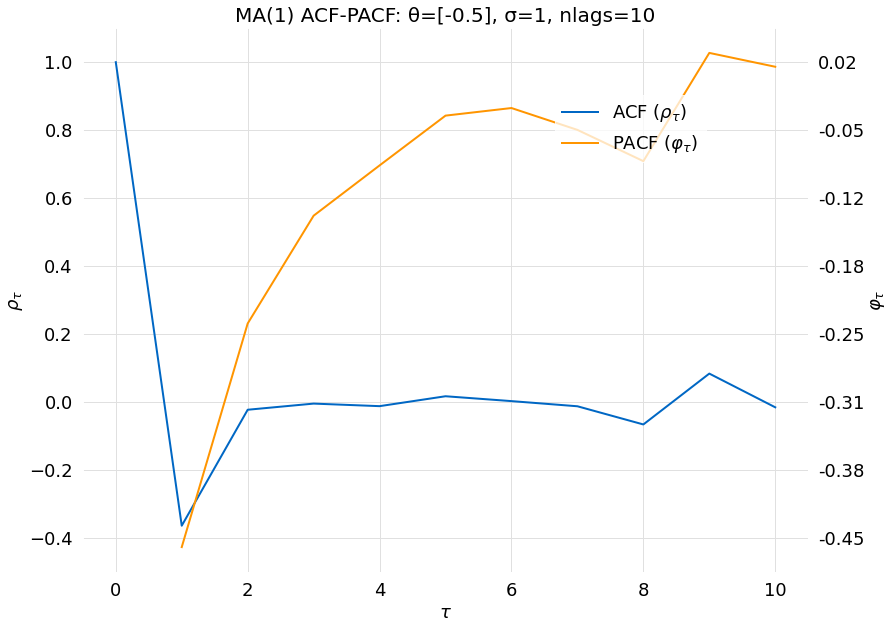

In [95]:
pacf_acf_plot(ma[1], nlags, [-0.5, 1.1])

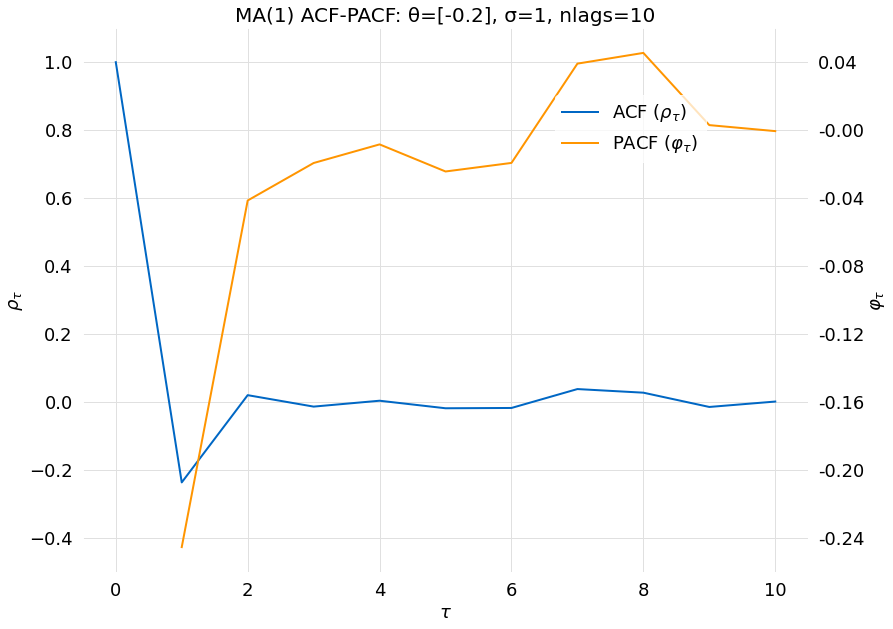

In [96]:
pacf_acf_plot(ma[2], nlags, [-0.5, 1.1])

### MA(2) and MA(3) Simulations

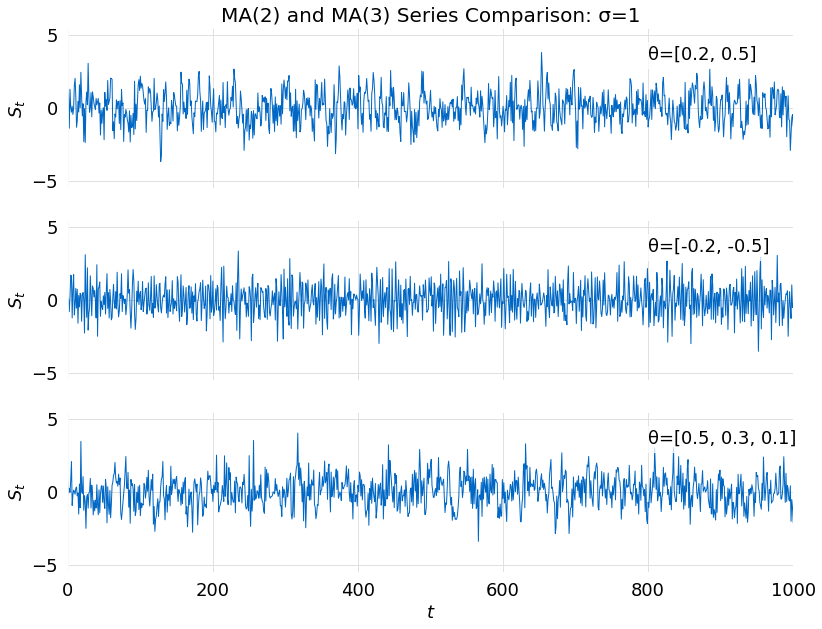

In [97]:
title = f"ΜΑ(2) and MA(3) Series Comparison: σ={σ}"
θ_vals = [[0.3, 0.4], [-0.3, -0.4], [0.2, 0.3, 0.2]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
ma = ma_comparison(φ_vals, title, [-5.5, 5.5], *params)

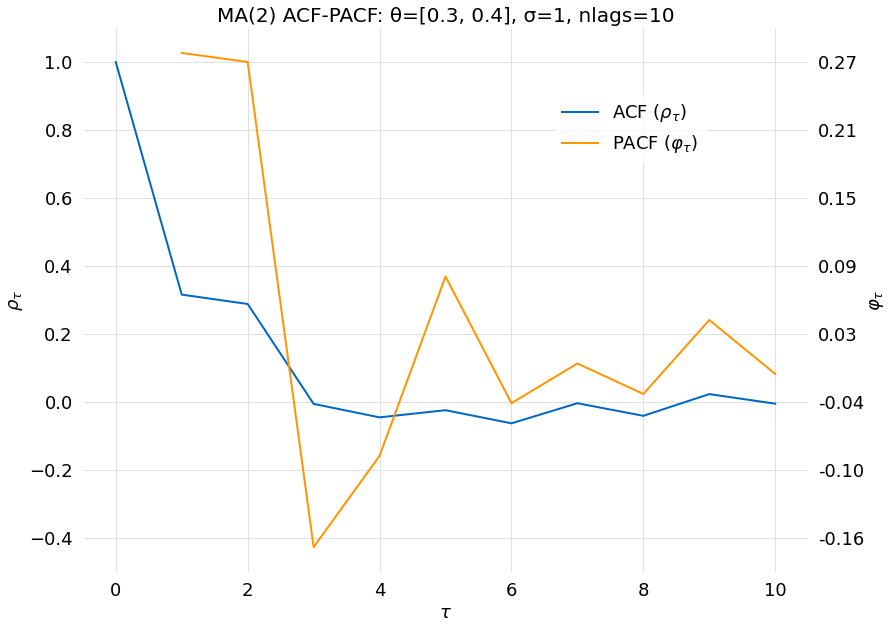

In [98]:
pacf_acf_plot(ma[0], nlags, [-0.5, 1.1])

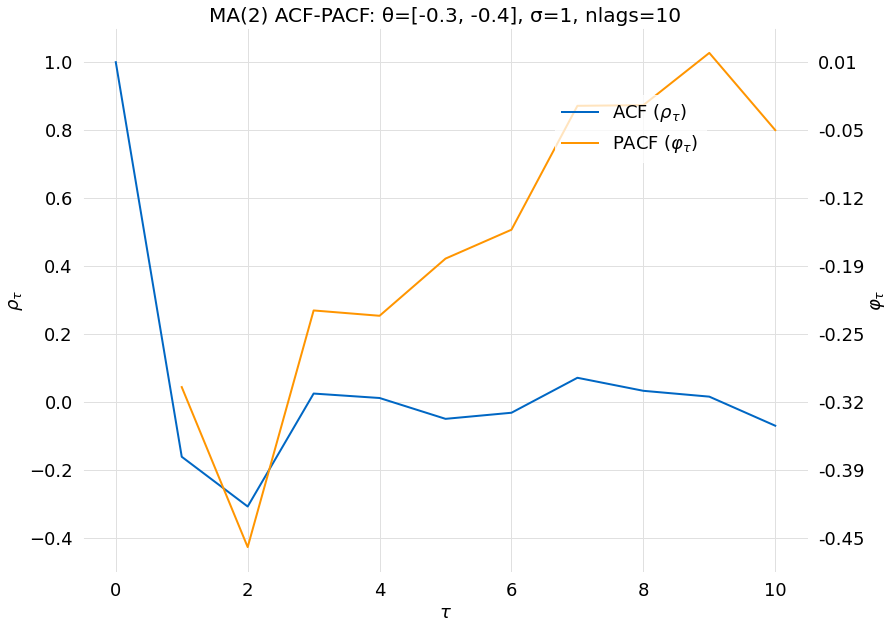

In [99]:
pacf_acf_plot(ma[1], nlags, [-0.5, 1.1])

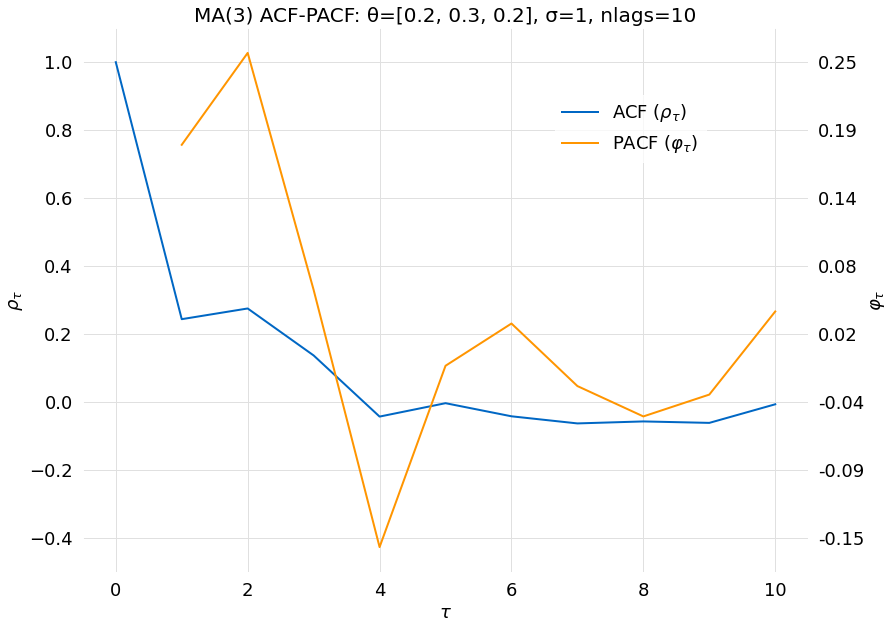

In [100]:
pacf_acf_plot(ma[2], nlags, [-0.5, 1.1])